----

**Clasificación de digitos**

*Juan Mancera López*

---

MNIST Dataset - Recuperado de https://www.kaggle.com/datasets/hojjatk/mnist-dataset

Para empezar en donde se encontraba este dataset venía el link a un notebook que demostraba como leer los archivos del dataset. Copie este notebook para poder manejar de una manera fácil los datasets.

In [1]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join
import os

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)  

Únicamente cambié la forma de obtener la ruta del dataset. Y al final un ejemplo de algunas imagenes y su número correspondiente. 

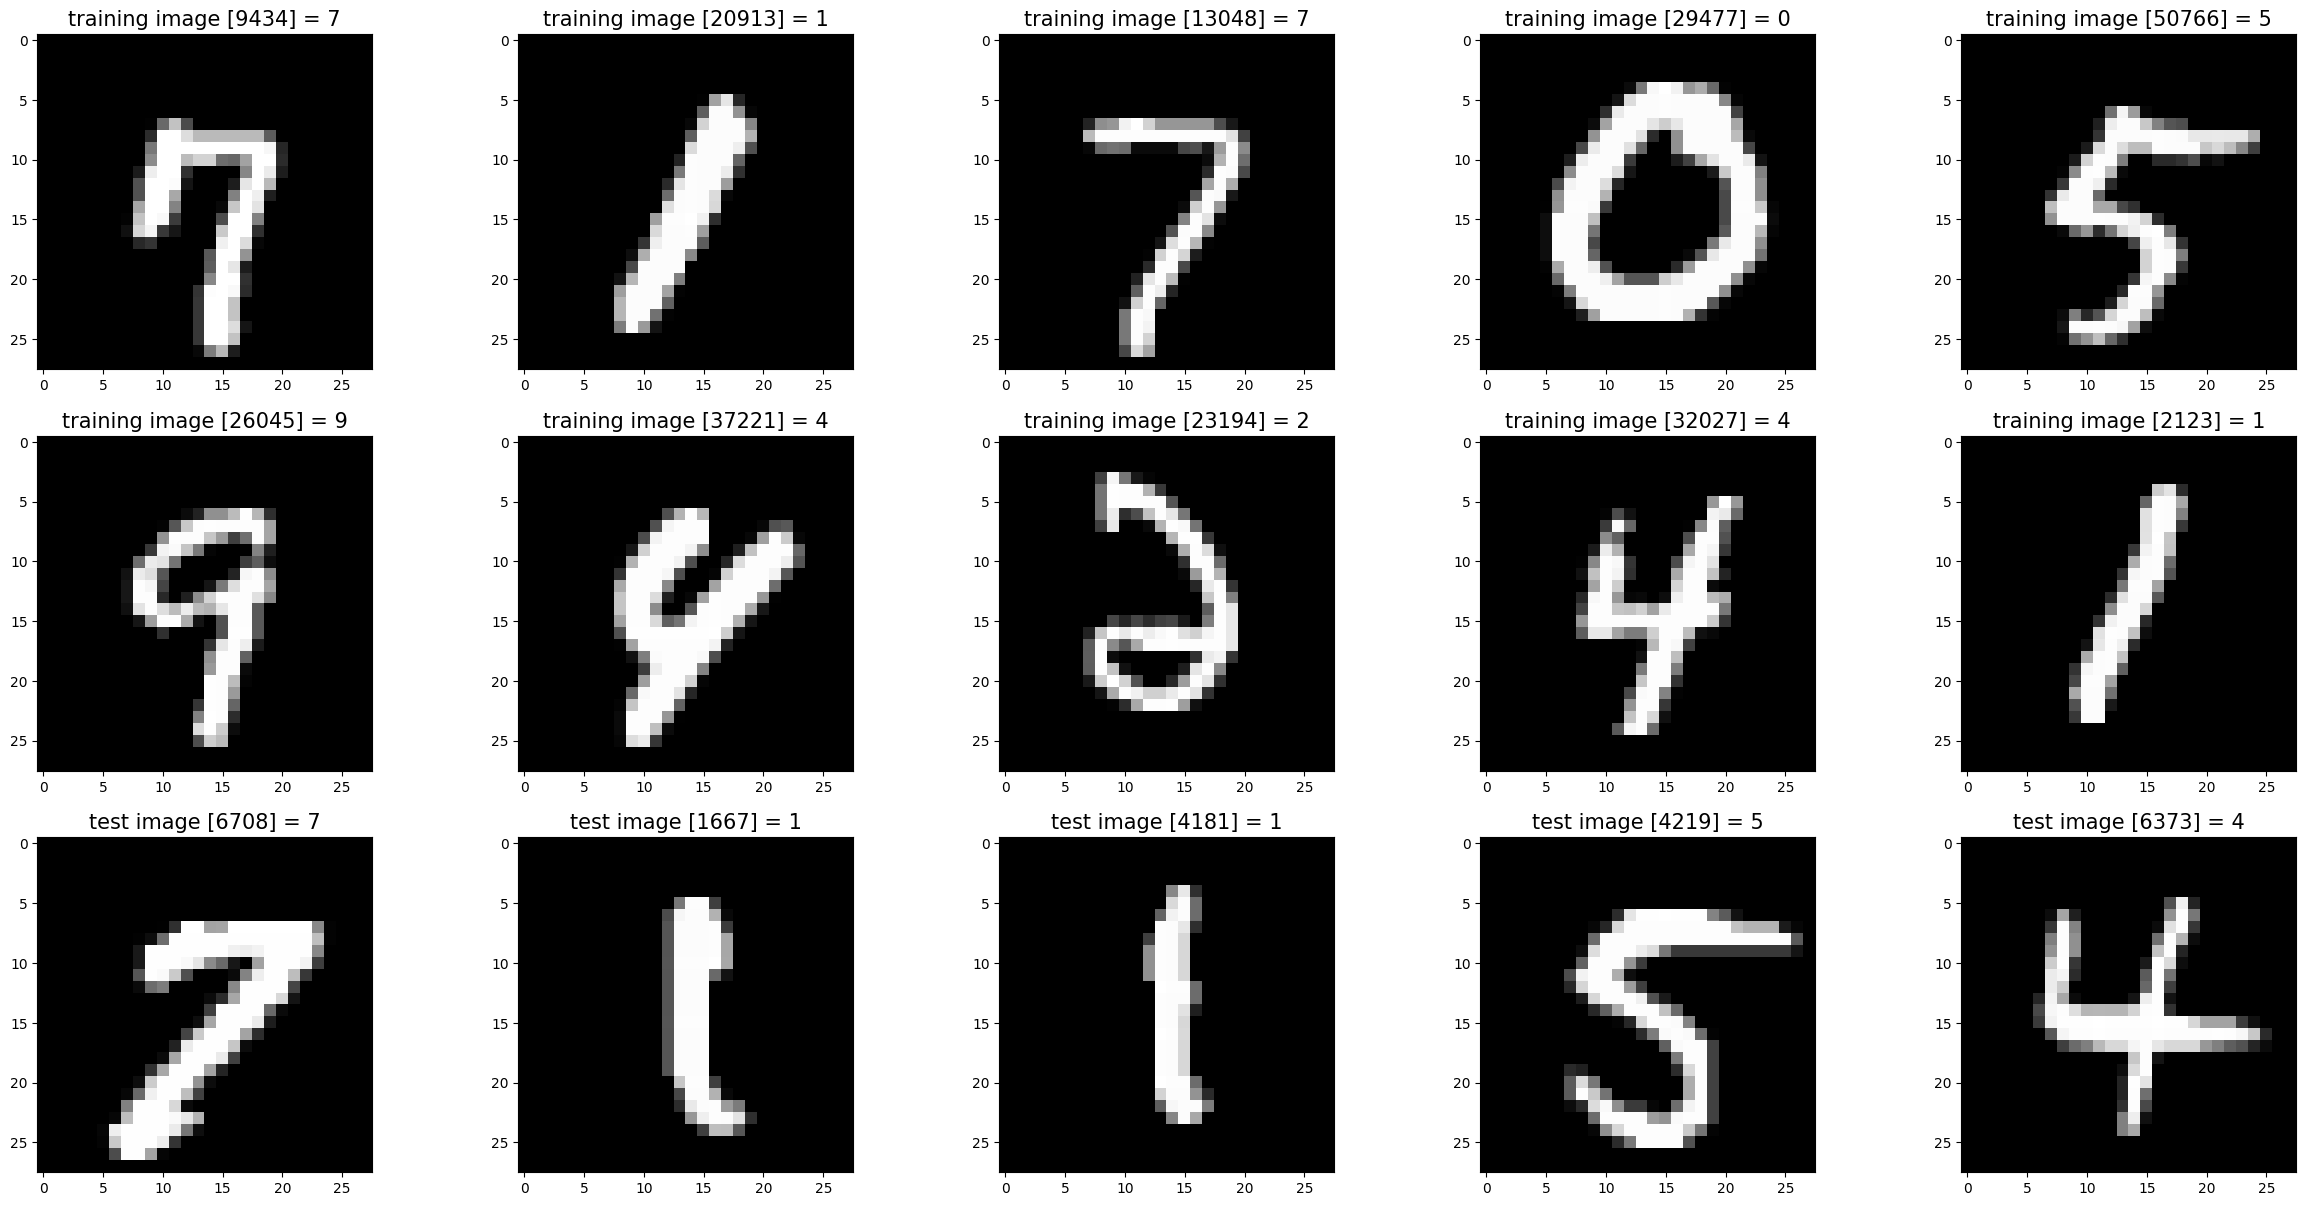

In [2]:
#
# Verify Reading Dataset via MnistDataloader class
#
#%matplotlib inline
import random
import matplotlib.pyplot as plt
from pathlib import Path

#
# Set file paths based on added MNIST Datasets
#
training_images_filepath = Path('train-images.idx3-ubyte').resolve()
training_labels_filepath = Path('train-labels.idx1-ubyte').resolve()
test_images_filepath = Path('t10k-images.idx3-ubyte').resolve()
test_labels_filepath = Path('t10k-labels.idx1-ubyte').resolve()

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

Ahora importamos las bibliotecas necesarias para generar la red neuronal.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

Definimos el modelo secuencial.

In [4]:
model = Sequential()

Creación de las capas.

La primera tiene el tamaño de una "imagen", 28x28 = 784 pixeles
Usamos la activación vista en clase (relu). Y para la capa final utilizamos softmax, ya que nos dará el "porcentaje" referente a cada una de las categorías o "números".

In [5]:
model.add(Dense( units=30, input_shape=(784,), activation='relu'))
model.add(Dense( units=30, activation='relu'))
model.add(Dense( units=10, activation='softmax'))

c:\Users\juanm\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilacion del modelo, donde usamos la pérdida "sparse_categorical_crossentropy", la cual ya que los resultados los obtendremos en una clasificación.

In [6]:
model.compile(optimizer=Adam(learning_rate=(0.01)), loss='sparse_categorical_crossentropy', metrics=["accuracy"])

Asignamos los datos para entrenamiento y prueba. Adempas los "x" (datos de la imagen) la cambiamos a un array, ya que esto es necesario para poder entrenar el modelo.

In [7]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1, 784).astype("float32") / 255
x_test = x_test.reshape(-1, 784).astype("float32") / 255

Entrenamos el modelo.

In [8]:
model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8677 - loss: 0.4234 - val_accuracy: 0.9407 - val_loss: 0.2046
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9490 - loss: 0.1711 - val_accuracy: 0.9526 - val_loss: 0.1691
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9557 - loss: 0.1467 - val_accuracy: 0.9468 - val_loss: 0.1991
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 0.9605 - loss: 0.1298 - val_accuracy: 0.9530 - val_loss: 0.1710
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9649 - loss: 0.1217 - val_accuracy: 0.9558 - val_loss: 0.1597
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9653 - loss: 0.1214 - val_accuracy: 0.9519 - val_loss: 0.1762
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9657 - loss: 0.1162 - val_accuracy: 0.9593 - val_loss: 0.1645
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9680 - loss: 0.1071 - val_accuracy: 

Hacemos una prueba de la exactitud y de la pérdida. Y vemos que es una muy alta.

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nPrecisión en datos de prueba: {test_acc:.4f}")

313/313 - 0s - 959us/step - accuracy: 0.9602 - loss: 0.2064

Precisión en datos de prueba: 0.9602


Ahora hacemos la prueba con una imagen aleatoria del dataset de prueba, comparando con la real, aunque por el momento no he visto ninguna que falle.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


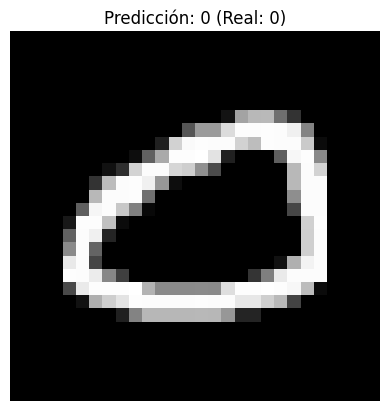

In [10]:
index = np.random.randint(0, len(x_test))  # Índice aleatorio
image = x_test[index].reshape(28, 28)  # Reconvertir la imagen si fue aplanada
label = y_test[index]  # Etiqueta real

# Realizar predicción
predictions = model.predict(x_test[index].reshape(1, 784))  # Ajusta forma para la red
predicted_label = np.argmax(predictions)  # Clase con mayor probabilidad

# Mostrar imagen y predicción
plt.imshow(image, cmap="gray")
plt.title(f"Predicción: {predicted_label} (Real: {label})")
plt.axis("off")
plt.show()

Para finalizar hace la prueba con 5 imagenes aleatorias.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


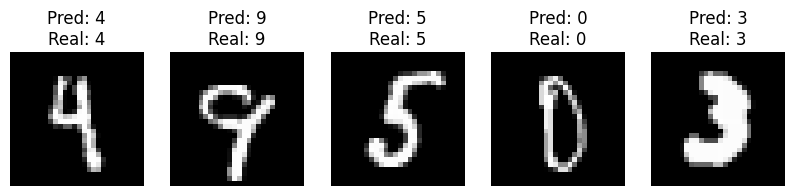

In [11]:
# Selecciona 5 índices aleatorios del conjunto de prueba
indices = np.random.choice(len(x_test), 5, replace=False)

# Obtiene las imágenes y etiquetas correspondientes
images = x_test[indices].reshape(-1, 28, 28)  # Reconvertir a 28x28 si fueron aplanadas
labels = y_test[indices]  # Etiquetas reales

# Realizar predicciones
predictions = model.predict(x_test[indices].reshape(5, 784))  # Ajusta forma para la red
predicted_labels = np.argmax(predictions, axis=1)  # Obtener la clase con mayor probabilidad

# Graficar las imágenes y mostrar predicciones
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(f"Pred: {predicted_labels[i]}\nReal: {labels[i]}")
    plt.axis("off")
plt.show()